# US Accidents (2016 - 2023)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from lazypredict.Supervised import LazyClassifier

In [ ]:
df=pd.read_csv('US_Accidents_March23.csv')

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/code

In [ ]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75,-84.21,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.63,-84.19,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00,-117.38,34.00,-117.37,0.54,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.77,-117.15,32.77,-117.15,0.34,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.78,-117.85,33.78,-117.86,0.56,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99,-118.40,33.98,-118.40,0.77,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns.values

array(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7728394 entries, 0 to 7728393

Data columns (total 46 columns):

 #   Column                 Dtype  

---  ------                 -----  

 0   ID                     object 

 1   Source                 object 

 2   Severity               int64  

 3   Start_Time             object 

 4   End_Time               object 

 5   Start_Lat              float64

 6   Start_Lng              float64

 7   End_Lat                float64

 8   End_Lng                float64

 9   Distance(mi)           float64

 10  Description            object 

 11  Street                 object 

 12  City                   object 

 13  County                 object 

 14  State                  object 

 15  Zipcode                object 

 16  Country                object 

 17  Timezone               object 

 18  Airport_Code           object 

 19  Weather_Timestamp      object 

 20  Temperature(F)         float64

 21  Wind_Chill(F)          float

In [ ]:
nan_counts = df.isnull().sum()
print(nan_counts)

ID                             0

Source                         0

Severity                       0

Start_Time                     0

End_Time                       0

Start_Lat                      0

Start_Lng                      0

End_Lat                  3402762

End_Lng                  3402762

Distance(mi)                   0

Description                    5

Street                     10869

City                         253

County                         0

State                          0

Zipcode                     1915

Country                        0

Timezone                    7808

Airport_Code               22635

Weather_Timestamp         120228

Temperature(F)            163853

Wind_Chill(F)            1999019

Humidity(%)               174144

Pressure(in)              140679

Visibility(mi)            177098

Wind_Direction            175206

Wind_Speed(mph)           571233

Precipitation(in)        2203586

Weather_Condition         173459

Amenity       

In [ ]:
df.drop(columns=['ID', 'Source',"Start_Lat", "Start_Lng", "End_Lat", "End_Lng","End_Time", "Weather_Timestamp","Zipcode","Street","Country", 'Description','Airport_Code', "Timezone"], inplace=True)

In [ ]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)


(7728394, 32)

(5217919, 32)


In [ ]:
df.columns.values

array(['Severity', 'Start_Time', 'Distance(mi)', 'City', 'County',
       'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype=object)

In [ ]:
column_name = 'City'
value_counts = df[column_name].value_counts()
print(value_counts)

Miami                           158906

Los Angeles                     104080

Houston                          91891

Charlotte                        87887

Orlando                          86909

                                 ...  

Iredell                              1

David City                           1

Moxee                                1

Mesilla Park                         1

American Fork-Pleasant Grove         1

Name: City, Length: 11295, dtype: int64


In [ ]:
column_name = 'County'
value_counts = df[column_name].value_counts()
print(value_counts)

Los Angeles    302804

Miami-Dade     215762

Orange         177904

Dallas         102179

Harris          96981

                ...  

Frontier            1

Tuscola             1

Terry               1

Gasconade           1

Ness                1

Name: County, Length: 1735, dtype: int64


In [ ]:
column_name = 'State'
value_counts = df[column_name].value_counts()
print(value_counts)

CA    1122294

FL     672595

TX     330291

SC     273175

NY     246391

NC     227290

VA     225851

PA     216011

MN     149791

OR     138763

TN     125254

AZ     111561

LA     110633

IL     101402

MI      97315

GA      96450

NJ      96174

MD      80939

AL      77378

OH      74475

UT      65585

CO      61402

WA      60496

CT      52940

MO      51479

OK      48158

MA      37420

IN      35961

MT      26335

WI      22504

AR      19752

KY      18961

IA      17832

DC      15767

KS      15377

NV      14452

WV      11403

DE      10884

MS      10332

NE      10003

ID       8995

RI       8694

NM       6306

NH       5416

ND       2712

WY       2514

ME       1427

VT        575

SD        204

Name: State, dtype: int64


In [ ]:
df_processed=df.drop(columns=["County","City"])

In [ ]:
df_processed

,Severity,Start_Time,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,2016-02-08 07:44:26,0.01,OH,37.90,35.50,97.00,29.63,7.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,2016-02-08 08:10:04,0.01,OH,37.40,33.80,100.00,29.62,3.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
11,3,2016-02-08 08:21:27,0.01,OH,37.40,33.80,100.00,29.62,3.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
14,2,2016-02-08 08:39:43,0.01,OH,37.40,33.80,100.00,29.62,3.00,SSW,...,False,False,False,False,True,False,Day,Day,Day,Day
20,2,2016-02-08 10:11:15,0.00,OH,33.80,29.60,100.00,29.62,2.00,NNW,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2,2019-08-23 18:03:25,0.54,CA,86.00,86.00,40.00,28.92,10.00,W,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,2,2019-08-23 19:11:30,0.34,CA,70.00,70.00,73.00,29.39,10.00,SW,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,2,2019-08-23 19:00:21,0.56,CA,73.00,73.00,64.00,29.74,10.00,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,2,2019-08-23 19:00:21,0.77,CA,71.00,71.00,81.00,29.62,10.00,SW,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
datetime_column = 'Start_Time'

df_processed[datetime_column] = pd.to_datetime(df_processed[datetime_column])

df_processed['year'] = df_processed[datetime_column].dt.year
df_processed['month'] = df_processed[datetime_column].dt.month
df_processed['day'] = df_processed[datetime_column].dt.day
df_processed['hour'] = df_processed[datetime_column].dt.hour


In [ ]:
df_processed=df_processed.drop(columns=["Start_Time"])

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5217919 entries, 5 to 7728393

Data columns (total 33 columns):

 #   Column                 Dtype  

---  ------                 -----  

 0   Severity               int64  

 1   Distance(mi)           float64

 2   State                  object 

 3   Temperature(F)         float64

 4   Wind_Chill(F)          float64

 5   Humidity(%)            float64

 6   Pressure(in)           float64

 7   Visibility(mi)         float64

 8   Wind_Direction         object 

 9   Wind_Speed(mph)        float64

 10  Precipitation(in)      float64

 11  Weather_Condition      object 

 12  Amenity                bool   

 13  Bump                   bool   

 14  Crossing               bool   

 15  Give_Way               bool   

 16  Junction               bool   

 17  No_Exit                bool   

 18  Railway                bool   

 19  Roundabout             bool   

 20  Station                bool   

 21  Stop                   bool 

In [ ]:
column_name = 'Sunrise_Sunset'
value_counts = df_processed[column_name].value_counts()
print(value_counts)

Day      3529326

Night    1688593

Name: Sunrise_Sunset, dtype: int64


In [ ]:
column_name = 'Civil_Twilight'
value_counts = df_processed[column_name].value_counts()
print(value_counts)

Day      3768288

Night    1449631

Name: Civil_Twilight, dtype: int64


In [ ]:
categorical_columns = df_processed.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['State', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for column in categorical_columns:
    df_processed[column] = label_encoder.fit_transform(df_processed[column])

In [ ]:
column_name = "Severity"
value_counts = df_processed[column_name].value_counts()
print(value_counts)

2    4446908

3     583878

4     125089

1      62044

Name: Severity, dtype: int64


In [ ]:
target=df_processed["Severity"]

x=df_processed.drop(columns=["Severity"])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x

,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,day,hour
5,0.01,33,37.90,35.50,97.00,29.63,7.00,14,3.50,0.03,...,0,0,0,0,0,0,2016,2,8,7
9,0.01,33,37.40,33.80,100.00,29.62,3.00,14,4.60,0.02,...,0,0,0,0,0,0,2016,2,8,8
11,0.01,33,37.40,33.80,100.00,29.62,3.00,14,4.60,0.02,...,0,0,0,0,0,0,2016,2,8,8
14,0.01,33,37.40,33.80,100.00,29.62,3.00,14,4.60,0.02,...,1,0,0,0,0,0,2016,2,8,8
20,0.00,33,33.80,29.60,100.00,29.62,2.00,8,4.60,0.01,...,0,0,0,0,0,0,2016,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,0.54,3,86.00,86.00,40.00,28.92,10.00,19,13.00,0.00,...,0,0,0,0,0,0,2019,8,23,18
7728390,0.34,3,70.00,70.00,73.00,29.39,10.00,15,6.00,0.00,...,0,0,0,0,0,0,2019,8,23,19
7728391,0.56,3,73.00,73.00,64.00,29.74,10.00,14,10.00,0.00,...,0,0,0,0,0,0,2019,8,23,19
7728392,0.77,3,71.00,71.00,81.00,29.62,10.00,15,8.00,0.00,...,0,0,0,0,0,0,2019,8,23,19


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.3, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.88

[[   8139    8725    1602      28]

 [   2948 1302786   27628     798]

 [   1304  114019   58759     979]

 [     34   32786    3074    1767]]


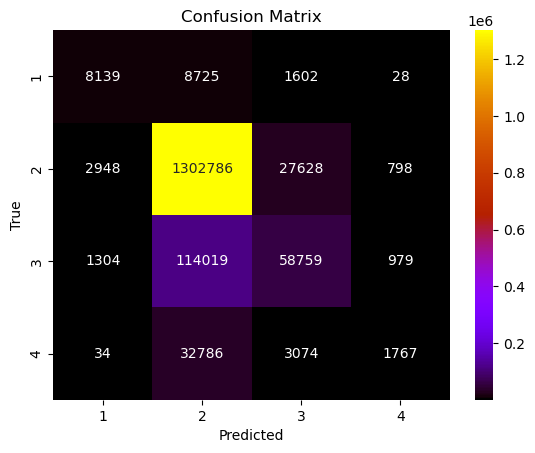

              precision    recall  f1-score   support



           1       0.66      0.44      0.53     18494

           2       0.89      0.98      0.93   1334160

           3       0.65      0.34      0.44    175061

           4       0.49      0.05      0.09     37661



    accuracy                           0.88   1565376

   macro avg       0.67      0.45      0.50   1565376

weighted avg       0.85      0.88      0.85   1565376




In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gnuplot', xticklabels=['1', '2', '3', '4'], yticklabels=['1', '2', '3', '4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the pipeline
print(classification_report(y_test, y_pred))

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


smote = SMOTE(sampling_strategy='auto', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Create an imbalanced-learn pipeline
pipeline = Pipeline([
    ('under', under_sampler),
    ('smote', smote)
])

# Apply the pipeline to the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
lgbm_classifier = LGBMClassifier(n_estimators=50, random_state=42)

# Train the classifier
lgbm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.59

[[ 17216    275    510    493]

 [ 54384 761025 221591 297160]

 [ 17324  10530 123128  24079]

 [  1099   5780   1090  29692]]


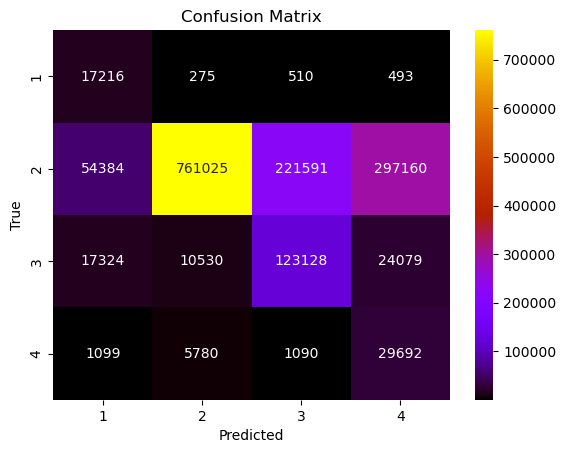

              precision    recall  f1-score   support



           1       0.19      0.93      0.32     18494

           2       0.98      0.57      0.72   1334160

           3       0.36      0.70      0.47    175061

           4       0.08      0.79      0.15     37661



    accuracy                           0.59   1565376

   macro avg       0.40      0.75      0.42   1565376

weighted avg       0.88      0.59      0.67   1565376




In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gnuplot', xticklabels=['1', '2', '3', '4'], yticklabels=['1', '2', '3', '4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the pipeline
print(classification_report(y_test, y_pred))

# ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 100
y_train_for_model=y_train-1
history = model.fit(
    X_train,
    y_train_for_model,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100

73051/73051 [==============================] - 126s 2ms/step - loss: 0.3717 - accuracy: 0.8602 - val_loss: 0.3515 - val_accuracy: 0.8647 - lr: 0.0010

Epoch 2/100

73051/73051 [==============================] - 126s 2ms/step - loss: 0.3487 - accuracy: 0.8661 - val_loss: 0.3437 - val_accuracy: 0.8678 - lr: 0.0010

Epoch 3/100

73051/73051 [==============================] - 126s 2ms/step - loss: 0.3431 - accuracy: 0.8680 - val_loss: 0.3407 - val_accuracy: 0.8688 - lr: 0.0010

Epoch 4/100

73051/73051 [==============================] - 125s 2ms/step - loss: 0.3431 - accuracy: 0.8693 - val_loss: 0.3438 - val_accuracy: 0.8693 - lr: 0.0010

Epoch 5/100

73051/73051 [==============================] - 125s 2ms/step - loss: 0.3404 - accuracy: 0.8695 - val_loss: 0.3336 - val_accuracy: 0.8700 - lr: 0.0010

Epoch 6/100

73051/73051 [==============================] - 124s 2ms/step - loss: 0.3377 - accuracy: 0.8700 - val_loss: 0.3331 - val_accuracy: 0.8705 - lr: 0.0010

Epoch 7/100

730

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
print(y_pred)
import numpy as np
def find_max_indices(array_of_arrays):
    max_indices = np.argmax(array_of_arrays, axis=1)
    return max_indices

accuracy = accuracy_score(y_test-1,find_max_indices(y_pred))
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test-1, find_max_indices(y_pred))
print(conf_matrix)

[[9.6532119e-08 9.6095616e-01 6.0202116e-03 3.3023562e-02]

 [5.7339957e-06 9.3400091e-01 2.7623618e-02 3.8369723e-02]

 [6.6121829e-06 9.8410773e-01 1.0611398e-05 1.5874993e-02]

 ...

 [2.3672478e-04 8.7511957e-01 1.2389578e-01 7.4794533e-04]

 [1.3515996e-08 9.8597395e-01 7.2423178e-03 6.7838226e-03]

 [1.9111421e-05 1.3004954e-01 8.6724585e-01 2.6855005e-03]]

Accuracy: 0.87

[[   6138   10579    1712      65]

 [   2421 1300238   30639     862]

 [   1156  113088   60126     691]

 [     32   31773    4416    1440]]
